In [1]:
from pandas import Series

data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data=data, index=index)
print(s)from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import requests
from bs4 import BeautifulSoup
url = "https://www.whitehouse.gov/briefings-statements/the-inaugural-address/"
resp = requests.get(url)
html = resp.text
soup = BeautifulSoup(html, 'html5lib')
tags = soup.select("#main-content > div.page-content > div > div > p")
text = ""
for tag in tags:
text += tag.text + " "
lower_text = text.lower()
print(lower_text)
tokenizer = RegexpTokenizer(r"\w+")
result = [x for x in tokenizer.tokenize(lower_text) if x not in stopwords.words('english')]
fd_names = FreqDist(result)
print(fd_names.most_common(5))

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


In [2]:
from pandas import Series

data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data=data, index=index)

print(s.iloc[0])
print(s.loc['메로나'])
print(s['메로나'])

1000
1000
1000


In [6]:
from pandas import Series

data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data=data, index=index)

bool_values = [True, True, False]
print(s)
print(s[bool_values])


메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64
메로나    1000
구구콘    2000
dtype: int64


In [19]:
s= Series(data = ['hi','bye','hello'],
         index =[ 'a','b','c'])

print(s.loc['hi':'hello'])

Series([], dtype: object)


In [25]:
s= Series(data = [100,200,300],
         index =[ 'a','b','c'])

cond = s>100
print(cond)
s[cond]

a    False
b     True
c     True
dtype: bool


b    200
c    300
dtype: int64

In [27]:
import pandas as pd

data = {
    "제조사": ["롯데제과", "빙그레", "빙그레"],
    "가격": [2000, 1000, 1000],
    "출시년도": [1985, 1992, 1975]
}
index = ["구구콘", "메로나", "비비빅"]
df = pd.DataFrame(data=data, index=index)
print(df)

      제조사    가격  출시년도
구구콘  롯데제과  2000  1985
메로나   빙그레  1000  1992
비비빅   빙그레  1000  1975


In [38]:
data = [[100,200,300],[400,500,600],[700,800,900]]
df = pd.DataFrame(data, index = ['a','b','c'], columns= ['d','e','f'] )
#row 뽑기
df.iloc[0]
df['a':'a']
df.loc['a']
#col 뽑기
df['d']

a    100
b    400
c    700
Name: d, dtype: int64

In [43]:
df['e'].loc['b']
#advance indexing
print(df.iloc[1,1])
print(df.iloc[2,2])
df.iloc[[0,1]][['d','e']]

500
900


,d,e
a,100,200
b,400,500


In [47]:
df['g'] = df['f']
print(df)
df = df[['d','e','f']]

     d    e    f    g
a  100  200  300  300
b  400  500  600  600
c  700  800  900  900


In [49]:
cond = df['d']>200
cond

a    False
b     True
c     True
Name: d, dtype: bool

In [50]:
df.loc[df['d']>200,'e']

b    500
c    800
Name: e, dtype: int64

In [59]:
from pykrx import stock
df = stock.get_market_ohlcv_by_date(
"20190101","20191230","005490")
df.head()
cond = df['시가'] < df['종가']
print(len(df[cond]))
print(len(df))

116
246


In [58]:
#5일 이동평균 선
df['시가'].rolling(5).mean()

날짜
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08    242100.0
                ...   
2019-12-23    245500.0
2019-12-24    246100.0
2019-12-26    244900.0
2019-12-27    243900.0
2019-12-30    242100.0
Name: 시가, Length: 246, dtype: float64

In [61]:
df['수익'] =df['종가'] - df['시가']
df['수익'].sum()
df['종가'].plot()
df['종가'].min()
df['종가'].max()

-7000

In [77]:
text = '''
park 800905-1049118
kim 700905-1059119
'''

result = []
for line in text.split("\n"):
    for token in line.split(" "):
        if len(token) == 14 and token[:6].isdigit() and token[7:].isdigit():
            token = token[:6] + "-" + "*******"
            result.append(token)

output = "\n".join(result)
print(output)


800905-*******
700905-*******


In [80]:
import re 


p = re.compile('\d+\-\d+')
print(p.findall(text))
# text = '' 


['800905-1049118', '700905-1059119']


In [84]:
text = "불가능을 가능으로!"
p= re.compile('가능')
re.findall(p,text)
p.findall(text)
p.search(text).group()

'가능'

In [86]:
text = '010-3316-7816'
p = re.compile('-')
p.sub('@@',text)

'010@@3316@@7816'

In [89]:
import re
text = '''내가 그린 기린 그림은 잘 그린 기린 그림이고
네가 그린 기린 그림은 잘 못 그린 기린 그림이다.'''
p = re.compile(r"기린")
m = re.findall(p, text)
print(m)

['기린', '기린', '기린', '기린']


In [91]:
text = """abc 01033167816 ABC"""
p = re.compile(r"[A-z]+")
result = p.findall(text)
result

['abc', 'ABC']

In [97]:
text = """abc 010-3316-7816 ABC"""
# p = re.compile(r"[0-9-]+")
p = re.compile(r"[^0-9-]+") # 대괄호 안에 ^ 를 붙이면 아닌!,  아니면 시작하는 의미를 가진다
result = p.findall(text)
result

['abc ', ' ABC']

In [129]:
text = """
a1.xis
b1.xis
c1.xis"""
# p = re.compile(r"[0-9-]+")
# p = re.compile(r"[ab][0-9].xis")
p = re.compile(r"[ab]\d.xis")
# result = p.findall(text)

# result
print(p)

re.compile('[ab]\\d.xis')


In [105]:

import nltk

In [106]:
import konlpy

In [108]:
s = 'Apple'
s.upper()
s.lower()

'apple'

In [128]:
import requests as rq
from bs4 import BeautifulSoup as bt

url = 'https://www.nytimes.com/2020/01/13/technology/oyo-hotel-india-softbank.html'
html = rq.get(url)
html = html.text
soup = bt(html, 'html5lib')
result = soup.select('#story > section > div > div > p ')
for i in result:
    print(i.text)

MUMBAI, India — Oyo, once one of India’s fastest-growing tech start-ups, is now rapidly scaling back.
In recent weeks, Oyo, a budget hospitality company, has pulled out of dozens of cities, cut thousands of hotel rooms, started laying off employees and slashed other costs as it faced pressure from its biggest investor, the Japanese conglomerate SoftBank, to curb vast operating losses. 
The retreat has been swift and sweeping. In India alone, Oyo has lost more than 65,000 rooms — or about a quarter of what it had offered to travelers — since October, according to internal data from current and former employees that was reviewed by The New York Times. This month, Oyo also stopped selling rooms in more than 200 small Indian cities, according to company documents and one current employee and one former employee. 
The moves come on top of more than 2,000 layoffs around the world, which Oyo began rolling out last week, according to six current and former employees. Before the cutbacks, Oyo h

In [136]:
from nltk.corpus import stopwords
nltk.download("stopwords")

eng_stopwords = stopwords.words('english')
print(len(eng_stopwords))
print(eng_stopwords[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /home/pirl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [137]:
words = ["설", "연휴", "민족", "대이동", "시작", "늘어", "교통량",
"교통사고", "특히", "자동차", "고장", "상당수", "차지",
"나타", "것", "기자"]
stopwords = ["가다", "늘어", "나타", "것", "기자"]
words2 = [w for w in words if w not in stopwords]
print(words2)

['설', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수', '차지']


In [143]:
from nltk.tokenize import word_tokenize
text = "Boeing’s troubles run deep. The 737 Max, its newest and most important jet, has been grounded since March after two deadly crashes killed 346 people."
print(word_tokenize(text))

['Boeing', '’', 's', 'troubles', 'run', 'deep', '.', 'The', '737', 'Max', ',', 'its', 'newest', 'and', 'most', 'important', 'jet', ',', 'has', 'been', 'grounded', 'since', 'March', 'after', 'two', 'deadly', 'crashes', 'killed', '346', 'people', '.']


In [147]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pirl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
#문장구분
from nltk.tokenize import sent_tokenize
text = "Boeing’s troubles run deep. The 737 Max, its newest and most important jet, has been grounded since March after two deadly crashes killed 346 people."
print(sent_tokenize(text))

['Boeing’s troubles run deep.', 'The 737 Max, its newest and most important jet, has been grounded since March after two deadly crashes killed 346 people.']


In [154]:
#트위터식으로 토크나이즈 하기
from nltk.tokenize import TweetTokenizer
text = "@Jason, Let's finish #projectA quickly."
tknzr = TweetTokenizer()
print(tknzr.tokenize(text))

['@Jason', ',', "Let's", 'finish', '#projectA', 'quickly', '.']


In [155]:
#대문자 뽑기
from nltk.tokenize import RegexpTokenizer
text = """
ESPRESSO
caffeinated dreams espresso blend
ESPRESSO CON PANNA
double espresso + whipped cream
ESPRESSO MACCHIATO
double espresso + milk foam -traditional
"""
tokenizer = RegexpTokenizer(r'[A-Z]+')
print(tokenizer.tokenize(text))

['ESPRESSO', 'ESPRESSO', 'CON', 'PANNA', 'ESPRESSO', 'MACCHIATO']


In [156]:
#단어수 세리기
from nltk import FreqDist
text = """
ESPRESSO
caffeinated dreams espresso blend
ESPRESSO CON PANNA
double espresso + whipped cream
ESPRESSO MACCHIATO
double espresso + milk foam -traditional
"""
fd = FreqDist(text.lower().split())
print(fd.most_common(5))

[('espresso', 6), ('double', 2), ('+', 2), ('caffeinated', 1), ('dreams', 1)]


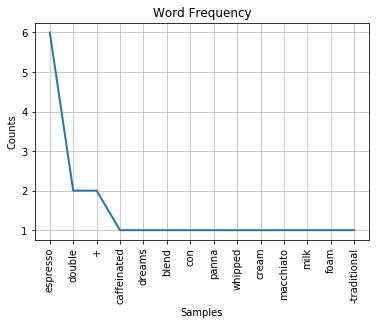

In [158]:
fd = FreqDist(text.lower().split())
fd.plot(title="Word Frequency", cumulative=False)

In [162]:
#빈도수 확률로 계산
from nltk import FreqDist
fd = FreqDist(text.split())
words = set(text.split())
for w in words:
    print(f"{w:12s} : {fd.freq(w):.4f}")

caffeinated  : 0.0476
cream        : 0.0476
ESPRESSO     : 0.1429
milk         : 0.0476
CON          : 0.0476
dreams       : 0.0476
double       : 0.0952
+            : 0.0952
MACCHIATO    : 0.0476
foam         : 0.0476
-traditional : 0.0476
whipped      : 0.0476
espresso     : 0.1429
PANNA        : 0.0476
blend        : 0.0476


In [167]:
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import requests
from bs4 import BeautifulSoup
url = "https://www.whitehouse.gov/briefings-statements/the-inaugural-address/"
resp = requests.get(url)
html = resp.text
soup = BeautifulSoup(html, 'html5lib')
tags = soup.select("#main-content > div.page-content > div > div > p")
text = ""
for tag in tags:
    text += tag.text + " "
lower_text = text.lower()
# print(lower_text)
tokenizer = RegexpTokenizer(r"\w+")
result = [x for x in tokenizer.tokenize(lower_text) if x not in stopwords.words('english')]
fd_names = FreqDist(result)
print(fd_names.most_common(5))

[('america', 18), ('american', 12), ('people', 9), ('country', 9), ('nation', 9)]


In [171]:
# day02/03_text_preprocessing/11.py
from konlpy.tag import Okt
okt=Okt()
# print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# 메소드 의미
# morphs 형태소 추출
# Pos 품사 태깅(Part-of-speech tagging
# nouns 명사 추출
# 69
# 형태소
# 형태소 + 품사 태킹
# 명사 추출

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [170]:
from konlpy.tag import Kkma
kkma=Kkma()
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
['코딩', '당신', '연휴', '여행']


In [172]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
text = '''It is important to be immersed while you are pythoning with python.
All pythoners have pythoned poorly at least once'''
text = text.lower()
# tokeninzer
words = word_tokenize(text)
print(words)
# stemming
porter_stemmer = PorterStemmer()
for w in words:
    print(w, porter_stemmer.stem(w))

['it', 'is', 'important', 'to', 'be', 'immersed', 'while', 'you', 'are', 'pythoning', 'with', 'python', '.', 'all', 'pythoners', 'have', 'pythoned', 'poorly', 'at', 'least', 'once']
it it
is is
important import
to to
be be
immersed immers
while while
you you
are are
pythoning python
with with
python python
. .
all all
pythoners python
have have
pythoned python
poorly poorli
at at
least least
once onc


In [173]:
from konlpy.tag import Okt
okt = Okt()
text = "한글 자연어 처리는 재밌다. 이제부터 열심히 해야지."
print(okt.morphs(text))
print(okt.morphs(text, stem=True))

['한글', '자연어', '처리', '는', '재밌다', '.', '이제', '부터', '열심히', '해야지', '.']
['한글', '자연어', '처리', '는', '재밌다', '.', '이제', '부터', '열심히', '하다', '.']


In [180]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
text = "Boeing's troubles run deep. The 737 Max, its newest and most important jet, has been grounded since March after two deadly crashes killed 346 people."
tokens = word_tokenize(text)
tags = pos_tag(tokens)
result = [x[0] for x in tags if x[1][:2] == "NN"]
print(result)

['Boeing', 'troubles', 'Max', 'jet', 'March', 'crashes', 'people']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pirl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [181]:
from konlpy.tag import Hannanum
phrase = "친척들이 모인 이번 설에서는 단연 '취업'이 화제에 올랐다."
hannanum = Hannanum()
print(hannanum.morphs(phrase))
print(hannanum.nouns(phrase))
print(hannanum.pos(phrase))
# 문장을 형태소 단위로 끊어줌
# 명사만 추출
# 형태소에 품사를 태깅함

['친척들', '이', '모이', 'ㄴ', '이번', '설', '에서는', '단연', "'", '취업', "'", '이', '화제', '에', '오르', '아다', '.']
['친척들', '이번', '설', '취업', '화제']
[('친척들', 'N'), ('이', 'J'), ('모이', 'P'), ('ㄴ', 'E'), ('이번', 'N'), ('설', 'N'), ('에서는', 'J'), ('단연', 'M'), ("'", 'S'), ('취업', 'N'), ("'", 'S'), ('이', 'J'), ('화제', 'N'), ('에', 'J'), ('오르', 'P'), ('아다', 'E'), ('.', 'S')]


In [189]:
from konlpy.tag import Okt
document = '봄과 함께 찾아온 따뜻한 신제품 소식'
okt = Okt()
words = okt.pos(document, stem=True) #stem=True 어근 형태
#print(words) #[('봄', 'Noun'), ('과', 'Josa'), ('함께', 'Adverb'), ('찾아오다', 'Verb'), ('따뜻하다',
# 'Adjective'), ('신제품', 'Noun'), ('소식', 'Noun')] #어간 추출
clean_words = [x [0] for x in words if x[1] in ['Noun', 'Verb', 'Adjective'] ]

print(clean_words)

['봄', '찾아오다', '따뜻하다', '신제품', '소식']


In [190]:
from konlpy.tag import Okt
document = '봄과 함께 찾아온 따뜻한 신제품 소식'
okt = Okt()
words = okt.pos(document, stem=True) #stem=True 어근 형태
#[('봄', 'Noun'), ('과', 'Josa'), ('함께', 'Adverb'), ('찾아오다', 'Verb'), ('따뜻하다', 'Adjective'), ('신제품', 'Noun'), ('소식',
# 'Noun')] #어간 추출
clean_words = [x[0] for x in words if x[1] == 'Noun']


print(clean_words)

['봄', '신제품', '소식']


In [191]:
from konlpy.tag import Okt
document = '봄과 함께 찾아온 따뜻한 신제품 소식'
okt = Okt()
clean_words = okt.nouns(document) #명사 추출
print(clean_words)

['봄', '신제품', '소식']


In [208]:
from konlpy.tag import Okt
from konlpy.tag import Komoran
import re
# 분석할 텍스트 읽어오기
with open('/home/pirl/포항공대 /아카데미수업내용/3주차/textmining/code/day02/03_text_preprocessing/news.txt', 'r', encoding='utf8') as f:
    content = f.read()

# 불필요한 심볼 없애기
p = re.compile("[\Wa-zA-Z0-9_]+")
content = re.sub(p, " ", content)
# print(content)
# 형태소 분석 및 단어 추출
okt = Okt()
okt_morphs = okt.pos(content)
print(okt_morphs)


# 명사만 추출하기
words = []
for word, pos in okt_morphs:
    if pos == 'Noun':
        words.append(word)
print(words)

[('독서', 'Noun'), ('의', 'Josa'), ('위기', 'Noun'), ('출판', 'Noun'), ('계', 'Suffix'), ('의', 'Josa'), ('불황', 'Noun'), ('얘기', 'Noun'), ('가', 'Josa'), ('나온', 'Verb'), ('지', 'Verb'), ('오래', 'Adverb'), ('됐지만', 'Verb'), ('사정', 'Noun'), ('이', 'Josa'), ('나아졌다는', 'Verb'), ('소식', 'Noun'), ('은', 'Josa'), ('들리지', 'Verb'), ('않는다', 'Verb'), ('요즘', 'Noun'), ('종이', 'Noun'), ('책', 'Noun'), ('은', 'Josa'), ('만', 'Modifier'), ('권', 'Noun'), ('정도', 'Noun'), ('만', 'Josa'), ('팔리면', 'Verb'), ('베스트셀러', 'Noun'), ('목록', 'Noun'), ('에', 'Josa'), ('오른다고', 'Verb'), ('한다', 'Verb'), ('하지만', 'Conjunction'), ('이', 'Noun'), ('와는', 'Josa'), ('분위기', 'Noun'), ('가', 'Josa'), ('사뭇', 'Noun'), ('다른', 'Noun'), ('곳', 'Noun'), ('이', 'Josa'), ('있다', 'Adjective'), ('스마트폰', 'Noun'), ('이나', 'Josa'), ('로', 'Noun'), ('읽는', 'Verb'), ('웹', 'Noun'), ('소설', 'Noun'), ('이다', 'Josa'), ('인기', 'Noun'), ('웹', 'Noun'), ('소설', 'Noun'), ('은', 'Josa'), ('독자', 'Noun'), ('수가', 'Noun'), ('백만', 'Noun'), ('명', 'Suffix'), ('을', 'Josa'), ('가볍게', 'Adjective'), ('

In [198]:
# day02/03_text_preprocessing/22.py
from collections import Counter
# 불용어 제거
stopwords = ['출처', '뉴스', '원본', '링크']
result = [x for x in words if x not in stopwords and len(x) > 1]
# print(result)
# 빈도 분석, 각 단어들이 몇 번 사용되었는지 분석
c = Counter(result)
print(c.most_common(3))

[('소설', 40), ('작가', 26), ('독자', 13)]


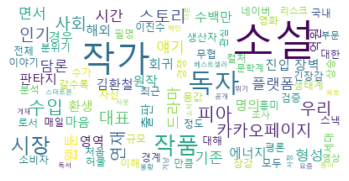

In [209]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = '/home/pirl/포항공대 /아카데미수업내용/2주차/malgun.ttf'
text = " ".join(result)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white',
relative_scaling=.5, font_path=FONT_PATH).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [211]:
from konlpy.tag import Okt
phrase = "나는 자연어 처리를 배운다"
okt = Okt()
token = okt.morphs(phrase)
print(token)

word_set = {}
index = 0
for t in token:
    if t not in word_set:
        word_set[t] = index
        index += 1

print(word_set)

['나', '는', '자연어', '처리', '를', '배운다']
{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [212]:
def one_hot_encoding(word, word_set):
    vector = [0] * len(word_set)
    index = word_set[word]
    vector[index] = 1
    return vector
print(one_hot_encoding("자연어", word_set))

[0, 0, 1, 0, 0, 0]


In [213]:
from konlpy.tag import Okt
import re
# 전처리
text1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
text1 = re.sub(r"\.", "", text1)
# 형태소 분리
okt = Okt()
token = okt.morphs(text1)

In [214]:
bow = {}
index = 0
for t in token:
    if t not in bow:
        bow[t] = index
        index += 1
print(bow)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [216]:
# 벡터화
vec = []
for w, i in bow.items():
    count = token.count(w)
    vec.append(count)
print(vec)

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [217]:
from sklearn.feature_extraction.text import CountVectorizer
text_data = [
'나는 배가 고프다',
'내일 점심 뭐먹지',
'내일 공부 해야겠다.',
'점심 먹고 공부해야지'
]
# 단어 사전 구성
# countvectorizer의 fit에서 자동으로 단어의 중복을 제거하여 가방을 생성함
count_vectorizer = CountVectorizer() # 객체 생성
count_vectorizer.fit(text_data)
# 단어 목록 생성
print(count_vectorizer.vocabulary_)
print(len(count_vectorizer.vocabulary_))

{'나는': 3, '배가': 7, '고프다': 0, '내일': 4, '점심': 8, '뭐먹지': 6, '공부': 1, '해야겠다': 9, '먹고': 5, '공부해야지': 2}
10


In [218]:
sentence = [text_data[0]]
# 첫 번째 문장
vector = count_vectorizer.transform(sentence).toarray()
print(vector)

[[1 0 0 1 0 0 0 1 0 0]]


In [219]:
# jonghun.yoo@outlook.com

In [223]:
xo, xe = [182, 213, 203], [154, 138, 110]
xc = pd.DataFrame([xo, xe], columns=['저', '중', '고'], index=['찬성', '반대'])
xc

,저,중,고
찬성,182,213,203
반대,154,138,110


In [224]:
from scipy.stats import chisquare

result = chisquare(xo, f_exp=xe)
result

Power_divergenceResult(statistic=124.47905138339921, pvalue=9.326472968402474e-28)